# ECC Demonstration

Import my ECC package into the environment

In [1]:
from ECC import *

### Key Generation
Declare the bit size we want to use

In [2]:
bitSize = 18

Generate a set of ECC keys with appropriate bitsize

In [3]:
ECC_keys = generate_ECC.KeyGen(bitSize, True)     # initalise object True sets verbose flag on KeyGen
ECC_keys.generateCurve()                          # create a curve
ECC_keys.generateKeys()                           # runs generator

Prime of  18 bits found: 234161
Checked 19 candidates in 0.00 s
Checked 1 curves
Public-Key: {
    Curve: y^2 = x^3 + 6x + 5 % 234161
    Base-Point: (145716, 117294)
    Public-Point: (220251, 216086)
}
Private-Key: 105688
n is 18 bits



True

### Brute Force Algorithm

In [4]:
bf = brute_force.BFSolver(ECC_keys.curve, ECC_keys.Q, ECC_keys.G, True)   # pass it public keys, and True verbose flag
bf.solve()                                                                # run solver

k: 105688
Time taken: 1.028 s
Numbers checked: 105688


True

### Baby Step - Giant Step Algorithm

In [ ]:
bsgs = baby_step.BGSolver(ECC_keys.curve, ECC_keys.Q, ECC_keys.G, True)   # pass it public keys, and True verbose flag
bsgs.solve()                                                              # run solver

k: 105688
Time taken: 0.072 s
Numbers checked: 652


True

### Pollard's Rho Algorithm

In [ ]:
rho = pollard_rho.PRSolver(ECC_keys.curve, ECC_keys.Q, ECC_keys.G, True)   # pass it public keys, and True verbose flag
rho.solve()                                                                # run solver

k: 105688
Time taken: 0.033 s
Numbers checked: 881


True

### Basic Analysis
Running the above algorithms on a variety of random inputs to create graphs showing general trends.

The below style code makes the format of the graphs nicer

In [ ]:
%%html
<style>
.output_wrapper button.btn.btn-default,
.output_wrapper .ui-dialog-titlebar {
  display: none;
}
</style>

Runs each algorithm in a thread and plots the results.

- Blue = Brute Force
- Orange = Baby-Step Giant-Step
- Green = Pollard's Rho

<IPython.core.display.Javascript object>


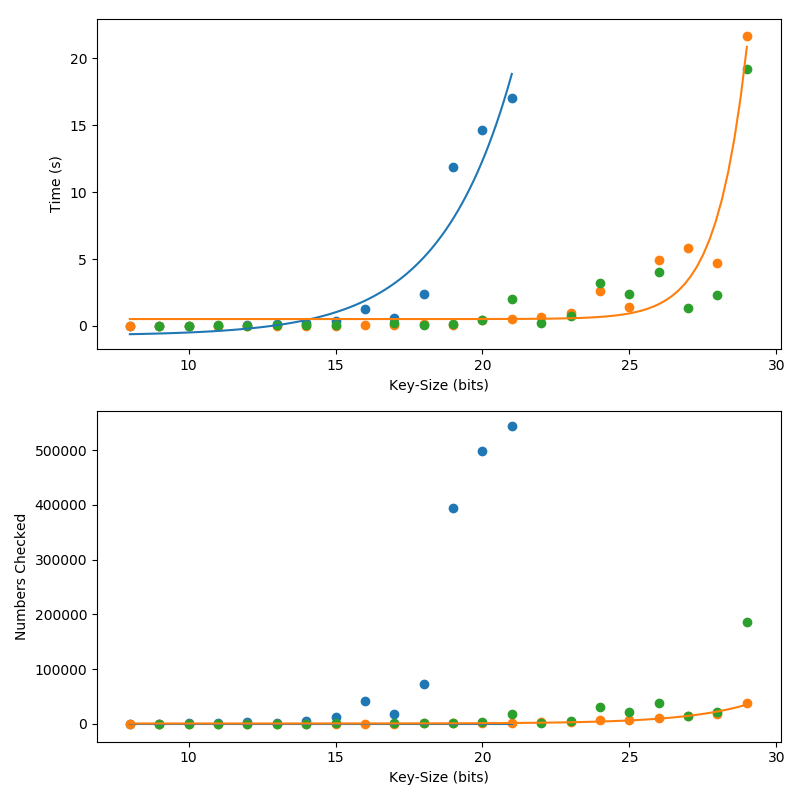

In [ ]:
%matplotlib notebook
from graphs_ECC import *

minBit = 8
bf_bit = 22
bsgs_bit = 30
rho_bit = 30

testGraphs(minBit, bf_bit, bsgs_bit, rho_bit)